<a href="https://colab.research.google.com/github/SUJOY-RAY/Machine-Learning-in-python/blob/main/Handwritten_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fetching dataset**

In [26]:
from sklearn.datasets import fetch_openml

In [27]:
mnist=fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [28]:
x,y=mnist['data'], mnist['target']

In [29]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
x.shape

(70000, 784)

In [31]:
import matplotlib.pyplot as plt

In [32]:
y.shape

(70000,)

In [50]:
some_digit=x[5]
some_digit_image=some_digit.reshape(28,28)  #reshape to plot it

In [34]:
%matplotlib inline

In [35]:
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

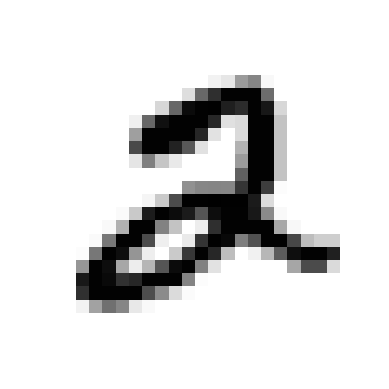

In [51]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')

In [37]:
y[1] #numeric value

'0'

In [38]:
x_train=x[:6000]
x_test=x[6000:]

In [39]:
y_train=y[6000:7000]
y_test=y[6000:7000]

In [40]:
import numpy as np
shuffle_index=np.random.permutation(500)
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]

# **Creating a 2 detector**

In [41]:
y_train=y_train.astype(np.int8)
y_test=y_train.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [42]:
y_train

array([2, 3, 3, 0, 9, 8, 9, 3, 9, 0, 4, 8, 6, 0, 7, 1, 5, 1, 6, 5, 8, 0,
       4, 8, 2, 2, 1, 2, 7, 5, 1, 0, 3, 6, 0, 4, 0, 2, 3, 2, 8, 2, 7, 1,
       7, 4, 2, 8, 7, 7, 6, 0, 4, 9, 2, 3, 2, 9, 4, 8, 6, 2, 8, 5, 0, 2,
       3, 0, 7, 4, 8, 1, 8, 2, 3, 6, 3, 8, 3, 6, 0, 7, 3, 4, 3, 8, 7, 2,
       3, 7, 1, 9, 9, 7, 7, 4, 2, 5, 1, 1, 7, 4, 5, 3, 9, 2, 2, 6, 6, 0,
       5, 7, 2, 2, 3, 8, 3, 2, 4, 4, 8, 8, 8, 1, 3, 2, 1, 1, 1, 2, 4, 3,
       7, 1, 7, 5, 6, 9, 4, 3, 2, 1, 6, 9, 6, 0, 8, 6, 2, 1, 5, 9, 5, 7,
       4, 0, 7, 4, 4, 7, 0, 0, 1, 2, 4, 5, 5, 4, 7, 2, 9, 6, 4, 9, 2, 0,
       3, 3, 6, 0, 0, 3, 8, 3, 3, 1, 2, 6, 7, 5, 3, 8, 1, 2, 8, 4, 3, 9,
       7, 6, 7, 9, 5, 9, 1, 9, 5, 9, 3, 5, 5, 5, 3, 4, 2, 1, 9, 8, 1, 7,
       0, 2, 7, 0, 0, 3, 4, 6, 0, 2, 1, 6, 8, 0, 7, 4, 6, 6, 5, 1, 9, 8,
       2, 0, 6, 3, 8, 6, 0, 5, 7, 5, 4, 8, 0, 1, 4, 6, 1, 6, 1, 4, 7, 7,
       2, 1, 0, 4, 9, 0, 0, 6, 3, 4, 9, 3, 8, 4, 5, 0, 8, 7, 2, 9, 0, 9,
       4, 0, 4, 5, 4, 5, 4, 9, 3, 7, 5, 1, 7, 0, 9,

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf=LogisticRegression(max_iter=1000)

In [45]:
clf.fit(x_train,y_train_2)

LogisticRegression(max_iter=1000)

In [52]:
print(clf.predict([some_digit]))


[ True]


In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train)

array([0.07, 0.13, 0.06, 0.17, 0.1 ])